In [1]:
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]
import os

In [2]:
%run -i "../gcmc.py"

In [3]:
y = 1
s = 34
n = 2 * 10**5
r = 1

yco = y
P = 20 #[MPa]
P_res = P*10**6 #[Pa]
T = 45 + 273.15 #K
fco, fme = PR_Fugacity( P_res/10**5, T, yco )
fco = fco*10**5
fme = fme*10**5

del_sf = "Nothing"#3.35 #[A]
rho_sf = "Nothing"#0.114 #[A^-3]
W = "Nothing"#5*3.8 #[A] relative to diameter of methane 3.80A
sf = False
mega_verbose = False

s_box = s #[A]
N_max = 50000
Vol = s_box**3
kb = 1.3806*10**(7) #[Pa*A^3/K]
Nco = 0 #floor(fco*Vol/kb/T)
Nme = 0 #floor(fme*Vol/kb/T)
Nc = 0
rc = s_box
beta = 1/T
zz_co = beta*fco
zz_me = beta*fme
delta = 1
pi_move = 0.5

N_moves = 1000
N_equil = 0
N_prod = int( np.round( n/N_moves) )


rhocov,rhomev,Env,Pv,Ncov, Nmev = mc_run(verbose = True)

output = pd.DataFrame()
output['rhocov'] = rhocov
output['rhomev'] = rhomev
output['Env'] = Env
output['Pv'] = Pv
output['Ncov'] = Ncov
output['Nmev'] = Nmev

20 	yco: 1.0 	N: 324 	P: 21.53 	En: -629.24 	Accept%: 0.423 0.339 0.271
40 	yco: 1.0 	N: 384 	P: -1.85 	En: -780.85 	Accept%: 0.477 0.14 0.127
60 	yco: 1.0 	N: 408 	P: 21.53 	En: -792.25 	Accept%: 0.498 0.089 0.085
80 	yco: 1.0 	N: 448 	P: 14.13 	En: -872.78 	Accept%: 0.516 0.062 0.056
100 	yco: 1.0 	N: 454 	P: 30.49 	En: -880.12 	Accept%: 0.504 0.055 0.052
120 	yco: 1.0 	N: 469 	P: 20.93 	En: -911.36 	Accept%: 0.49 0.051 0.048
140 	yco: 1.0 	N: 459 	P: 8.7 	En: -904.21 	Accept%: 0.507 0.048 0.053
160 	yco: 1.0 	N: 452 	P: 14.62 	En: -881.08 	Accept%: 0.499 0.052 0.053
180 	yco: 1.0 	N: 457 	P: 8.45 	En: -899.38 	Accept%: 0.502 0.041 0.04
200 	yco: 1.0 	N: 481 	P: 41.13 	En: -907.39 	Accept%: 0.498 0.049 0.043


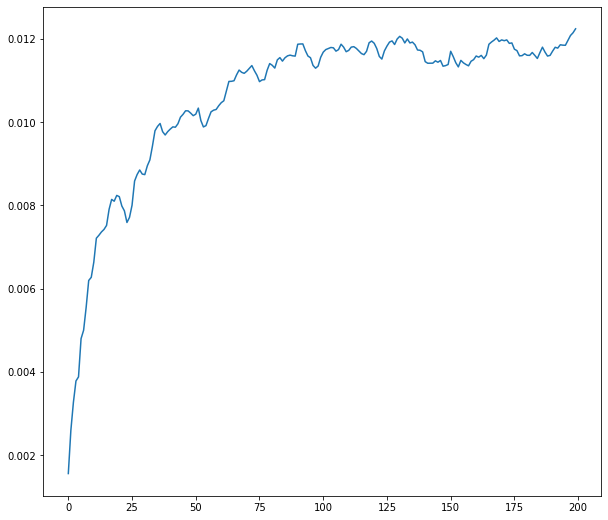

In [5]:
plt.plot( rhocov  )

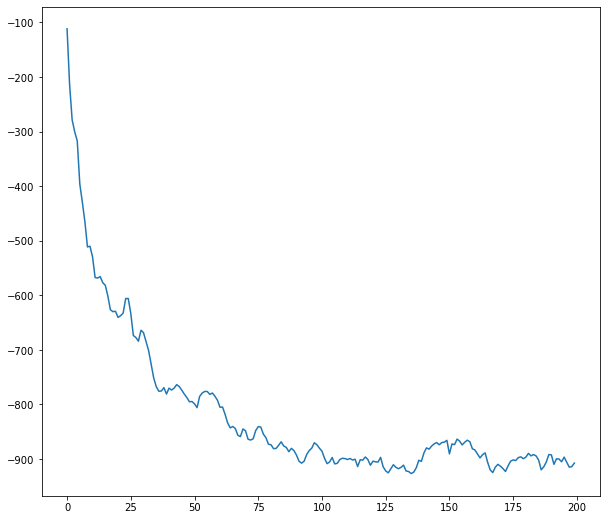

In [6]:
plt.plot( Env )

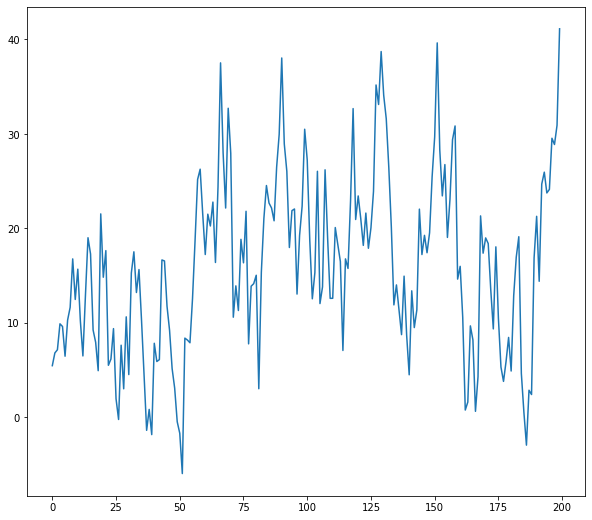

In [7]:
plt.plot( Pv )

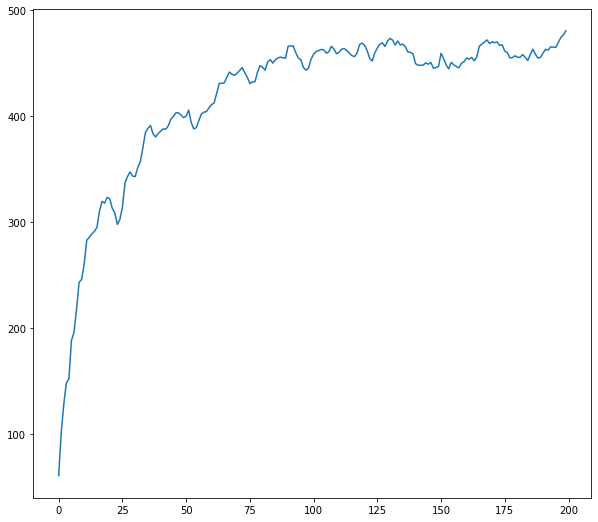

In [8]:
plt.plot( Ncov )

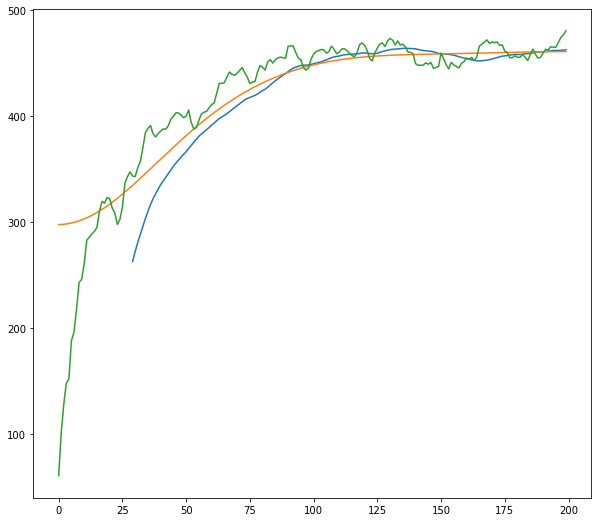

In [12]:
plt.plot( pd.Series( Ncov ).rolling(30).mean() )
plt.plot( gaussian_filter1d(Ncov, 30) )
plt.plot( Ncov  )

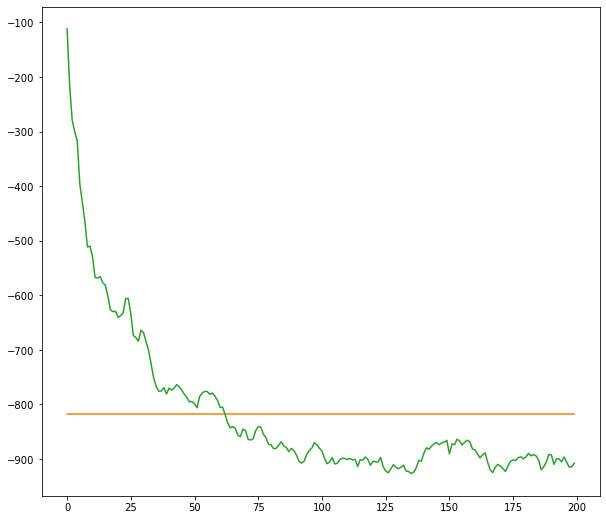

In [10]:
plt.plot( pd.Series( Env ).rolling(400).mean() )
plt.plot( gaussian_filter1d(Env, 300) )
plt.plot( Env )